In [253]:
from matplotlib import image as img_reader #image reading 
#image saving and demonstration
from PIL import Image 
import numpy as np

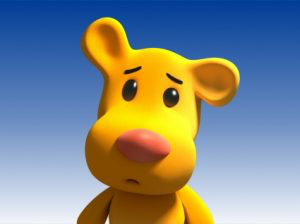

In [254]:
display(Image.open("s.jpg"))

# GrayScale Image

In [255]:
#this function will build our grayscale imag using YUV constant coefficients to calculate the brightness level
def yuv_gray_scale(image):
    c1 = 0.257 
    c2 = 0.504
    c3 = 0.098 
    image_gray = np.arange(0,(image.shape[0]*image.shape[1])).reshape(image.shape[0],image.shape[1])
    for i in range(0,image.shape[0]):
        for j in range(0,image.shape[1]):
            image_gray[i,j] = image[i,j,0]*c1 + image[i,j,1]*c2 + image[i,j,2]*c3 + 16

    return image_gray

In [258]:
def image_gray_scale(source):
    #image reading from source
    image = img_reader.imread(source)
    #using YUV
    image_gray = yuv_gray_scale(image)
    #saving image
    img_saver.fromarray(image).convert('L').save("grayscale.png")
    
    #final normalization
    return image_gray * (1/(np.max(image_gray)))

In [259]:
image_gray = image_gray_scale("s.jpg")

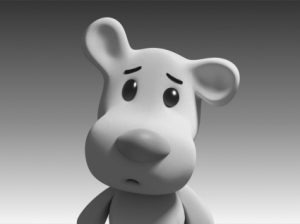

In [260]:
display(img_saver.open("grayscale.png"))

# Ordered Dithring

In [261]:
import random

#this function will randomly generate the dither matrix
def dither_random_matrix_generator(n):
    used_numbers = np.arange(0,(n**2)) * 0
    added_numbers_count = 0
    matrixLen = (n**2)-1
    while True:

        if added_numbers_count != matrixLen :
            
            random_number=random.randint(0,matrixLen) 
            #unrepeated one is acceptable
            if not random_number in used_numbers: 
                #unrepeated random number placing in dithering matrix
                used_numbers[added_numbers_count] = random_number
                added_numbers_count -=-1
        else : break
    
    matrix = used_numbers.reshape(n,n)
    return matrix / (n**2 - 1) #normalization

In [262]:
#order dithering dimention is 4 in this problem
orderd_dither_matrix = dither_random_matrix_generator(4)
orderd_dither_matrix

array([[0.13333333, 0.33333333, 0.46666667, 0.06666667],
       [0.8       , 0.2       , 0.6       , 1.        ],
       [0.66666667, 0.26666667, 0.4       , 0.93333333],
       [0.86666667, 0.53333333, 0.73333333, 0.        ]])

In [264]:
def ordered_dithering(image, orderd_dither_matrix):
    #n is for dither matrix dimention which we specified in first
    n = orderd_dither_matrix.shape[0]    
    for row in range(image.shape[0]):
        for column in range(image.shape[1]):
            
            dither_matrix_row = row % n
            dither_matrix_column = column % n
            
            #thresholding
            if image[row][column] > orderd_dither_matrix[dither_matrix_row][dither_matrix_column]:
                image[row][column] = 255
            else:
                image[row][column] = 0
    
    #saving image
    img_saver.fromarray(image).convert('L').save("o_dithered.png")

In [265]:
ordered_dithering(
    image = image_gray, 
    orderd_dither_matrix = orderd_dither_matrix
)

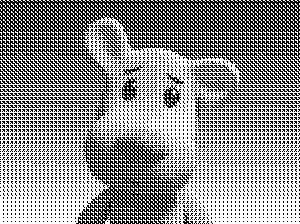

In [266]:
display(img_saver.open("o_dithered.png"))